In [2]:
# pip install fbprophet

In [1]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('San_Juan_Dengue_Data_Cleaned.csv')
df

,week_start_date,total_cases
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6
...,...,...
983,2009-03-26,24
984,2009-04-02,9
985,2009-04-09,21
986,2009-04-16,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   week_start_date  988 non-null    object
 1   total_cases      988 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.6+ KB


In [3]:
new_df = df.rename(columns={'week_start_date': 'ds', 'total_cases': 'y'})
new_df

,ds,y
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6
...,...,...
983,2009-03-26,24
984,2009-04-02,9
985,2009-04-09,21
986,2009-04-16,10


<Axes: xlabel='ds'>

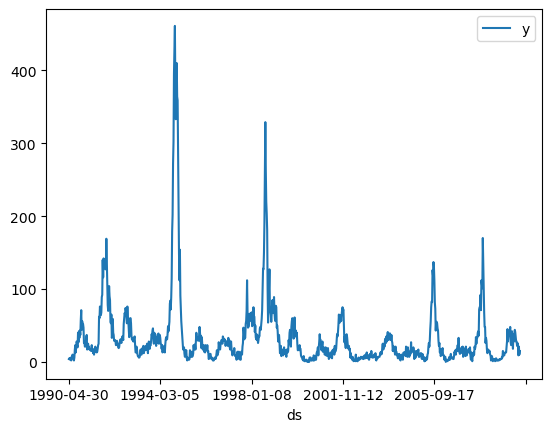

In [4]:
new_df.plot(x='ds', y='y')

In [5]:
new_df_train = new_df[:-9]
new_df_test = new_df[-9:]

In [6]:
new_df_train.shape, new_df_test.shape

((979, 2), (9, 2))

In [10]:
model=Prophet(weekly_seasonality=True)
model.fit(new_df_train)

17:56:04 - cmdstanpy - INFO - Chain [1] start processing
17:56:04 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [12]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=9, freq='7D', include_history=True)

In [13]:
future_dates

,ds
0,1990-04-30
1,1990-05-07
2,1990-05-14
3,1990-05-21
4,1990-05-28
...,...
983,2009-03-26
984,2009-04-02
985,2009-04-09
986,2009-04-16


In [14]:
prediction=model.predict(future_dates)

In [15]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-04-30,43.393930,-41.450954,66.887987,43.393930,43.393930,-31.494973,-31.494973,-31.494973,-7.378807,-7.378807,-7.378807,-24.116166,-24.116166,-24.116166,0.0,0.0,0.0,11.898957
1,1990-05-07,43.448359,-43.036795,65.891829,43.448359,43.448359,-31.114977,-31.114977,-31.114977,-7.378807,-7.378807,-7.378807,-23.736170,-23.736170,-23.736170,0.0,0.0,0.0,12.333382
2,1990-05-14,43.502788,-35.225984,65.555010,43.502788,43.502788,-30.219476,-30.219476,-30.219476,-7.378807,-7.378807,-7.378807,-22.840670,-22.840670,-22.840670,0.0,0.0,0.0,13.283312
3,1990-05-21,43.557218,-38.883534,69.745746,43.557218,43.557218,-29.455884,-29.455884,-29.455884,-7.378807,-7.378807,-7.378807,-22.077078,-22.077078,-22.077078,0.0,0.0,0.0,14.101333
4,1990-05-28,43.611647,-39.174205,67.495627,43.611647,43.611647,-28.962324,-28.962324,-28.962324,-7.378807,-7.378807,-7.378807,-21.583517,-21.583517,-21.583517,0.0,0.0,0.0,14.649323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2009-03-26,29.505609,-20.220807,87.917894,29.505609,29.505609,2.798135,2.798135,2.798135,24.664062,24.664062,24.664062,-21.865927,-21.865927,-21.865927,0.0,0.0,0.0,32.303744
984,2009-04-02,29.584120,-20.753953,85.273077,29.584120,29.584120,2.079810,2.079810,2.079810,24.664062,24.664062,24.664062,-22.584252,-22.584252,-22.584252,0.0,0.0,0.0,31.663930
985,2009-04-09,29.662631,-21.882558,81.969661,29.662631,29.662631,1.885272,1.885272,1.885272,24.664062,24.664062,24.664062,-22.778790,-22.778790,-22.778790,0.0,0.0,0.0,31.547903
986,2009-04-16,29.741142,-22.423977,82.291220,29.741142,29.741142,1.529719,1.529719,1.529719,24.664062,24.664062,24.664062,-23.134343,-23.134343,-23.134343,0.0,0.0,0.0,31.270861


c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


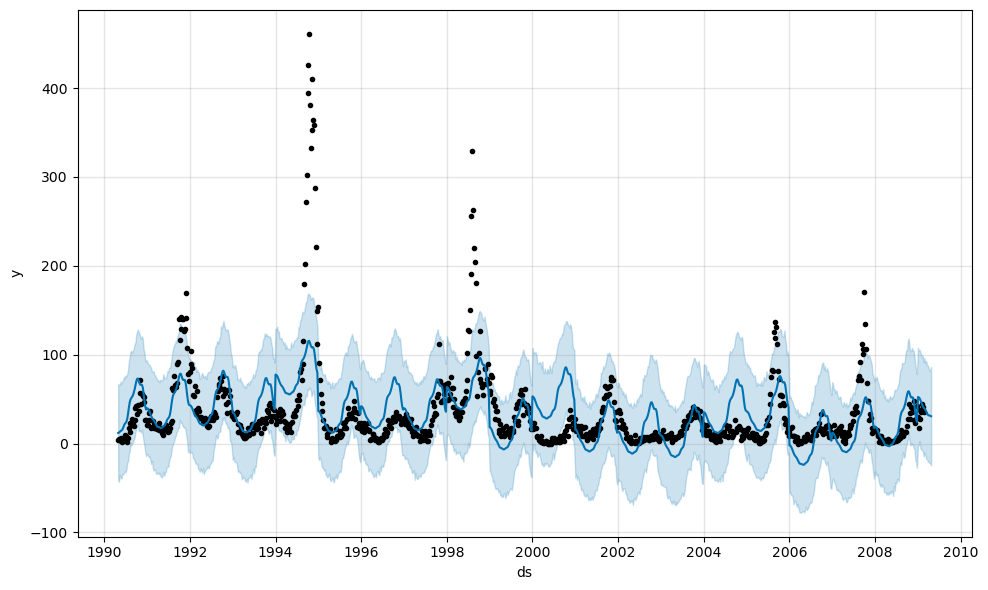

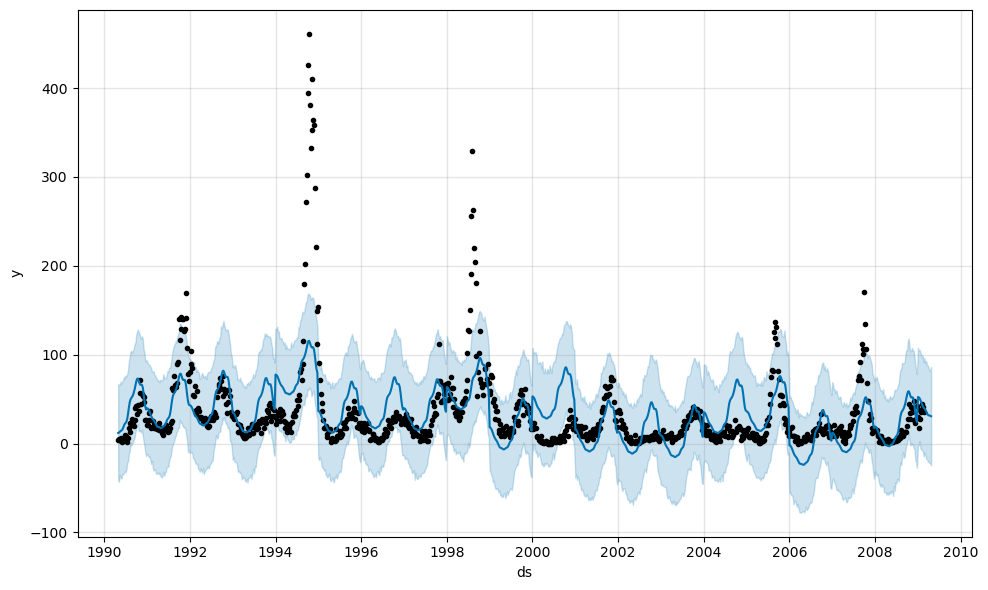

In [16]:
model.plot(prediction)

c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

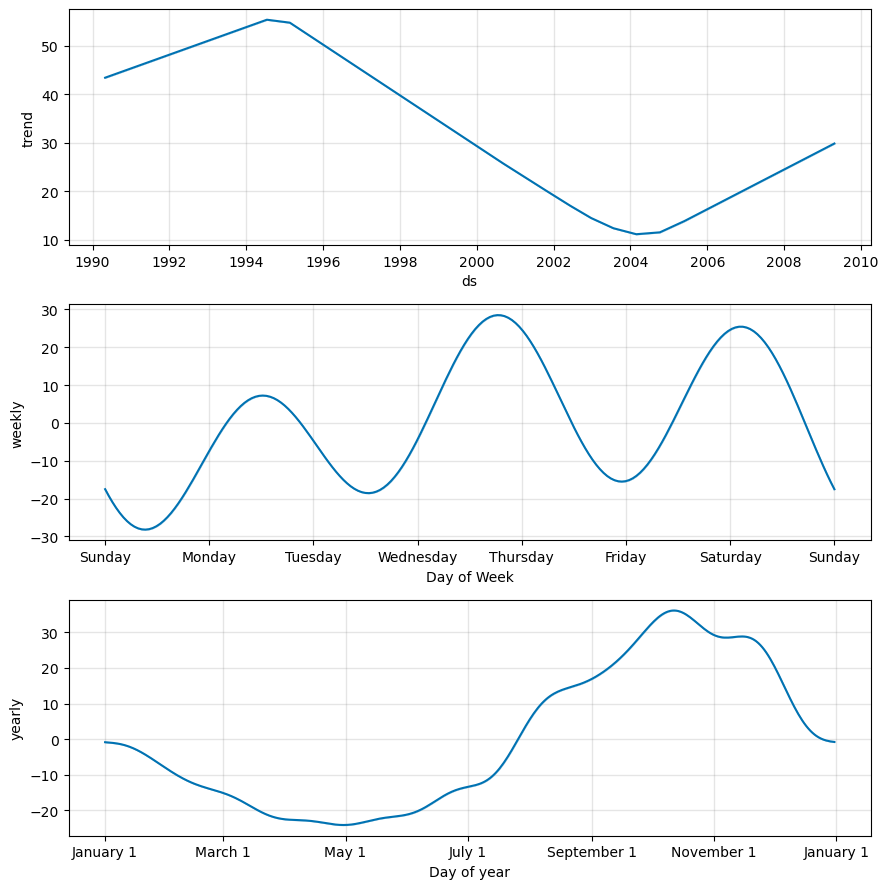

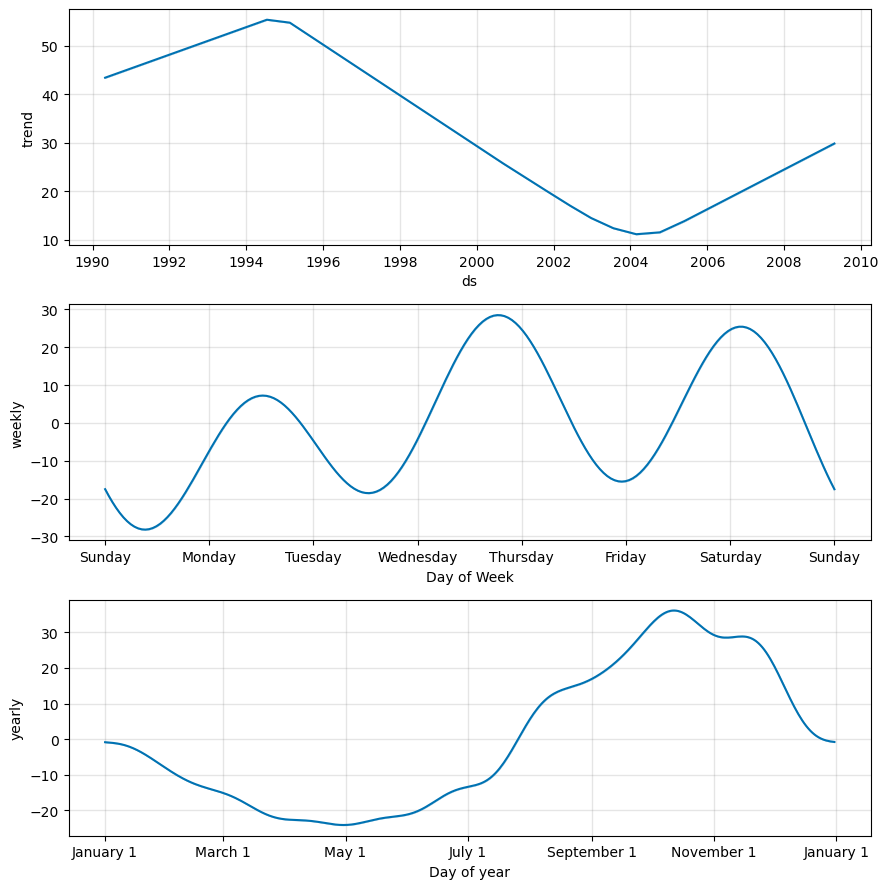

In [17]:
model.plot_components(prediction)

In [18]:
two_months_prediction = prediction[-9:]
two_months_prediction=two_months_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
two_months_prediction

,ds,yhat,yhat_lower,yhat_upper
979,2009-02-26,39.266280,-10.402099,96.064623
980,2009-03-05,37.928654,-12.918666,90.753399
981,2009-03-12,36.013171,-17.173425,92.844952
982,2009-03-19,33.880633,-17.657244,87.965985
983,2009-03-26,32.303744,-20.220807,87.917894
984,2009-04-02,31.663930,-20.753953,85.273077
985,2009-04-09,31.547903,-21.882558,81.969661
986,2009-04-16,31.270861,-22.423977,82.291220
987,2009-04-23,30.716364,-24.507771,86.254759


In [19]:
new_df_test

,ds,y
979,2009-02-26,28
980,2009-03-05,28
981,2009-03-12,22
982,2009-03-19,26
983,2009-03-26,24
984,2009-04-02,9
985,2009-04-09,21
986,2009-04-16,10
987,2009-04-23,15


In [20]:
actual=[]
predicted = []
for i in range(9):
    actual.append(new_df_test['y'].iloc[i])
    predicted.append(two_months_prediction['yhat'].iloc[i])

In [21]:
abs_error=0
for i in range(9):
    abs_error += abs(actual[i] - predicted[i])
mae = abs_error/len(actual)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 13.51


C:\Users\mrinmoy.halder\AppData\Local\Temp\ipykernel_5540\3713045067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_test['ds'] = pd.to_datetime(new_df_test['ds'])


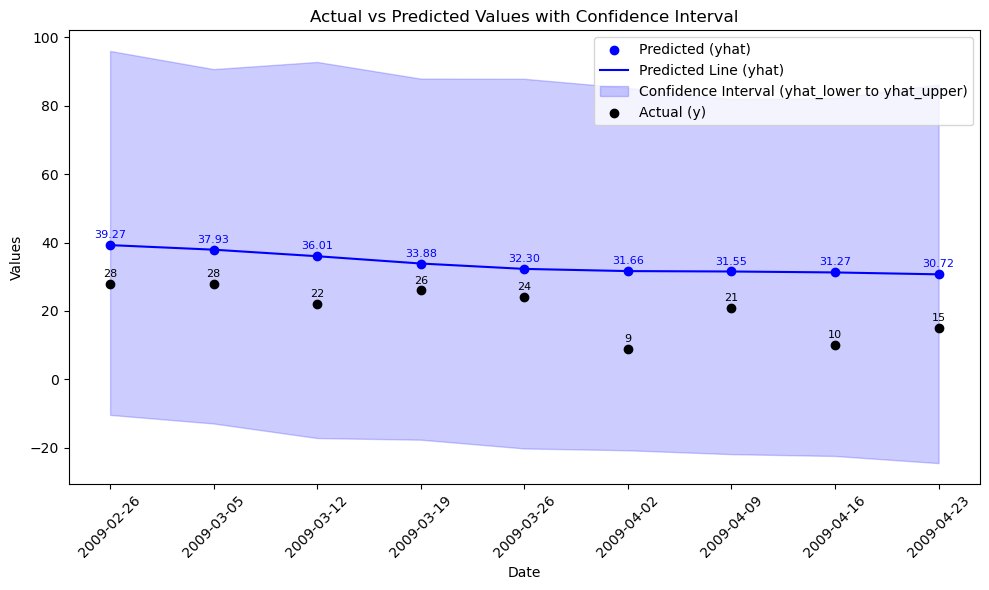

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'ds' columns are in datetime format
two_months_prediction['ds'] = pd.to_datetime(two_months_prediction['ds'])
new_df_test['ds'] = pd.to_datetime(new_df_test['ds'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values as points (yhat)
plt.scatter(two_months_prediction['ds'], two_months_prediction['yhat'], color='blue', label='Predicted (yhat)', marker='o')

# Plot line over predicted values (yhat)
plt.plot(two_months_prediction['ds'], two_months_prediction['yhat'], color='blue', label='Predicted Line (yhat)')

# Plot shaded area between yhat_lower and yhat_upper
plt.fill_between(two_months_prediction['ds'], two_months_prediction['yhat_lower'], two_months_prediction['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval (yhat_lower to yhat_upper)')

# Plot actual values with black dotted sample points (y)
plt.scatter(new_df_test['ds'], new_df_test['y'], color='black', label='Actual (y)', marker='o', zorder=3)

# Annotate predicted values (yhat)
for index, row in two_months_prediction.iterrows():
    plt.annotate(f"{row['yhat']:.2f}", 
                 (row['ds'], row['yhat']), 
                 textcoords="offset points", 
                 xytext=(0, 5),  # 5 points vertical offset
                 ha='center', 
                 fontsize=8,
                 color='blue')

# Add annotations for actual values (y)
for index, row in new_df_test.iterrows():
    plt.annotate(f"{row['y']}", 
                 (row['ds'], row['y']), 
                 textcoords="offset points", 
                 xytext=(0, 5),  # 5 points vertical offset
                 ha='center', 
                 fontsize=8,
                 color='black')

# Set x-ticks to show the actual dates present in the actual values dataframe
plt.xticks(new_df_test['ds'], rotation=45)  # Use the actual dates from 'ds' and rotate for better readability

# Labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values with Confidence Interval')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
# Perform cross-validation
df_cv = cross_validation(model, initial='300 W', period='52 W', horizon= '8 W')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
# mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
# rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'Root Mean Squared Error: {rmse:.2f}')

  0%|          | 0/13 [00:00<?, ?it/s]

17:56:06 - cmdstanpy - INFO - Chain [1] start processing


17:56:07 - cmdstanpy - INFO - Chain [1] done processing
17:56:07 - cmdstanpy - INFO - Chain [1] start processing
17:56:07 - cmdstanpy - INFO - Chain [1] done processing
17:56:07 - cmdstanpy - INFO - Chain [1] start processing
17:56:07 - cmdstanpy - INFO - Chain [1] done processing
17:56:07 - cmdstanpy - INFO - Chain [1] start processing
17:56:08 - cmdstanpy - INFO - Chain [1] done processing
17:56:08 - cmdstanpy - INFO - Chain [1] start processing
17:56:08 - cmdstanpy - INFO - Chain [1] done processing
17:56:08 - cmdstanpy - INFO - Chain [1] start processing
17:56:08 - cmdstanpy - INFO - Chain [1] done processing
17:56:08 - cmdstanpy - INFO - Chain [1] start processing
17:56:09 - cmdstanpy - INFO - Chain [1] done processing
17:56:09 - cmdstanpy - INFO - Chain [1] start processing
17:56:09 - cmdstanpy - INFO - Chain [1] done processing
17:56:09 - cmdstanpy - INFO - Chain [1] start processing
17:56:09 - cmdstanpy - INFO - Chain [1] done processing
17:56:09 - cmdstanpy - INFO - Chain [1] 

Mean Absolute Error: 37.00


In [24]:
df_metrics['horizon'] = pd.to_timedelta(df_metrics['horizon']).dt.days
df_metrics_weekly = df_metrics[df_metrics['horizon'] % 7 == 0]

In [25]:
df_metrics_weekly

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
1,7,1249.589955,35.349540,30.681000,1.997475,2.023932,1.169210,0.9
8,14,1444.762875,38.010037,32.971261,2.439538,2.455621,1.253071,0.9
15,21,1626.996806,40.336048,32.324812,1.924105,1.898209,1.132170,0.8
22,28,1609.775372,40.122006,33.006161,2.103765,2.206737,1.158958,0.8
29,35,1429.286171,37.805901,30.607573,3.031692,3.158889,1.169949,0.8
36,42,1663.615591,40.787444,32.322976,4.418754,2.654836,1.224744,0.8
43,49,1885.373681,43.420890,33.814953,3.123716,3.541153,1.242948,0.8
50,56,1678.212078,40.965987,31.739859,4.589638,3.028170,1.208375,0.8


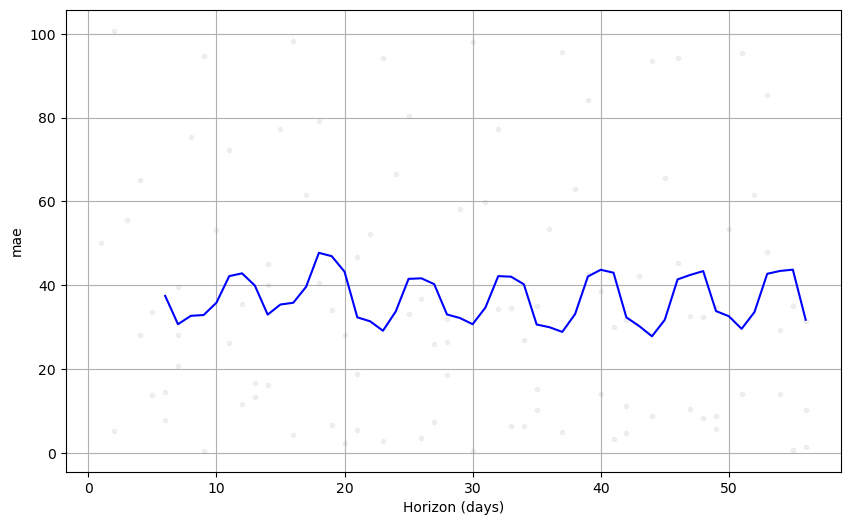

In [26]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

HyperParameter Tuning 

In [7]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    #'holidays_prior_scale':[0.01, 0.1, 1.0, 10.0]  ### it has no effect on the model
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  #Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(new_df)  # Fit model with given params
    df_cv = cross_validation(m, initial='300 W', period='52 W', horizon= '8 W', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
print(tuning_results)

20:54:48 - cmdstanpy - INFO - Chain [1] start processing
20:54:49 - cmdstanpy - INFO - Chain [1] done processing
20:54:55 - cmdstanpy - INFO - Chain [1] start processing
20:54:55 - cmdstanpy - INFO - Chain [1] done processing
20:55:01 - cmdstanpy - INFO - Chain [1] start processing
20:55:01 - cmdstanpy - INFO - Chain [1] done processing
20:55:06 - cmdstanpy - INFO - Chain [1] start processing
20:55:06 - cmdstanpy - INFO - Chain [1] done processing
20:55:12 - cmdstanpy - INFO - Chain [1] start processing
20:55:12 - cmdstanpy - INFO - Chain [1] done processing
20:55:17 - cmdstanpy - INFO - Chain [1] start processing
20:55:18 - cmdstanpy - INFO - Chain [1] done processing
20:55:23 - cmdstanpy - INFO - Chain [1] start processing
20:55:23 - cmdstanpy - INFO - Chain [1] done processing
20:55:29 - cmdstanpy - INFO - Chain [1] start processing
20:55:29 - cmdstanpy - INFO - Chain [1] done processing
20:55:34 - cmdstanpy - INFO - Chain [1] start processing
20:55:34 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale        mae
0                     0.001                     0.01  21.560393
1                     0.001                     0.10  15.587547
2                     0.001                     1.00  15.382157
3                     0.001                    10.00  16.273146
4                     0.010                     0.01  14.716638
5                     0.010                     0.10  13.078926
6                     0.010                     1.00  13.237411
7                     0.010                    10.00  12.972011
8                     0.100                     0.01  24.288477
9                     0.100                     0.10  28.835128
10                    0.100                     1.00  29.196189
11                    0.100                    10.00  28.481759
12                    0.500                     0.01  18.496589
13                    0.500                     0.10  20.587892
14                    0.500             

In [8]:
tuning_results

,changepoint_prior_scale,seasonality_prior_scale,mae
0,0.001,0.01,21.560393
1,0.001,0.10,15.587547
2,0.001,1.00,15.382157
3,0.001,10.00,16.273146
4,0.010,0.01,14.716638
5,0.010,0.10,13.078926
6,0.010,1.00,13.237411
7,0.010,10.00,12.972011
8,0.100,0.01,24.288477
9,0.100,0.10,28.835128


In [9]:
best_params = all_params[np.argmin(maes)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0}


Retrain the Model with best parameters

In [10]:
model=Prophet(weekly_seasonality=True, **best_params)
model.fit(new_df_train)

20:56:40 - cmdstanpy - INFO - Chain [1] start processing
20:56:40 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [12]:
### Create future dates of 2 months
future_dates=model.make_future_dataframe(periods=9, freq='7D', include_history=True)

In [13]:
future_dates

,ds
0,1990-04-30
1,1990-05-07
2,1990-05-14
3,1990-05-21
4,1990-05-28
...,...
983,2009-03-26
984,2009-04-02
985,2009-04-09
986,2009-04-16


In [14]:
prediction=model.predict(future_dates)

In [15]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-04-30,54.336687,-32.580768,79.057192,54.336687,54.336687,-31.807935,-31.807935,-31.807935,-7.279223,-7.279223,-7.279223,-24.528712,-24.528712,-24.528712,0.0,0.0,0.0,22.528752
1,1990-05-07,54.296470,-26.476829,77.462981,54.296470,54.296470,-31.583887,-31.583887,-31.583887,-7.279223,-7.279223,-7.279223,-24.304664,-24.304664,-24.304664,0.0,0.0,0.0,22.712583
2,1990-05-14,54.256253,-34.459749,73.599305,54.256253,54.256253,-30.749606,-30.749606,-30.749606,-7.279223,-7.279223,-7.279223,-23.470383,-23.470383,-23.470383,0.0,0.0,0.0,23.506647
3,1990-05-21,54.216036,-33.057216,79.978440,54.216036,54.216036,-29.935569,-29.935569,-29.935569,-7.279223,-7.279223,-7.279223,-22.656347,-22.656347,-22.656347,0.0,0.0,0.0,24.280466
4,1990-05-28,54.175819,-27.682637,79.240887,54.175819,54.175819,-29.345699,-29.345699,-29.345699,-7.279223,-7.279223,-7.279223,-22.066476,-22.066476,-22.066476,0.0,0.0,0.0,24.830119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2009-03-26,11.585910,-42.449529,66.829304,11.585910,11.585910,-0.565682,-0.565682,-0.565682,21.415714,21.415714,21.415714,-21.981396,-21.981396,-21.981396,0.0,0.0,0.0,11.020228
984,2009-04-02,11.543047,-41.718599,66.475191,11.543047,11.543047,-1.212499,-1.212499,-1.212499,21.415714,21.415714,21.415714,-22.628213,-22.628213,-22.628213,0.0,0.0,0.0,10.330548
985,2009-04-09,11.500185,-44.194343,67.105786,11.500185,11.500185,-1.406818,-1.406818,-1.406818,21.415714,21.415714,21.415714,-22.822531,-22.822531,-22.822531,0.0,0.0,0.0,10.093367
986,2009-04-16,11.457322,-45.215663,63.653074,11.457319,11.457378,-1.829614,-1.829614,-1.829614,21.415714,21.415714,21.415714,-23.245327,-23.245327,-23.245327,0.0,0.0,0.0,9.627708


c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


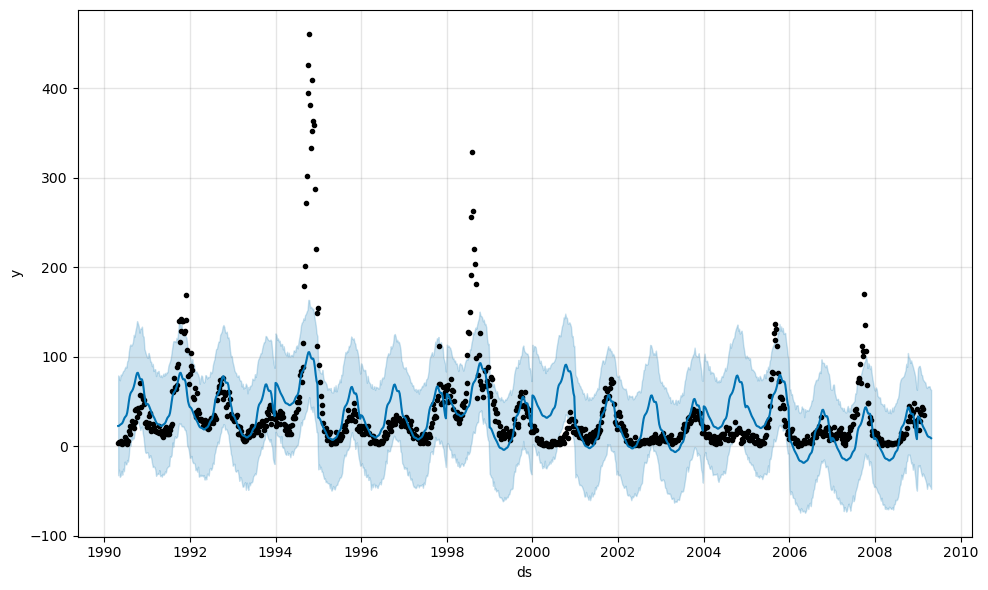

In [29]:
fig = model.plot(prediction)

c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\mrinmoy.halder\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

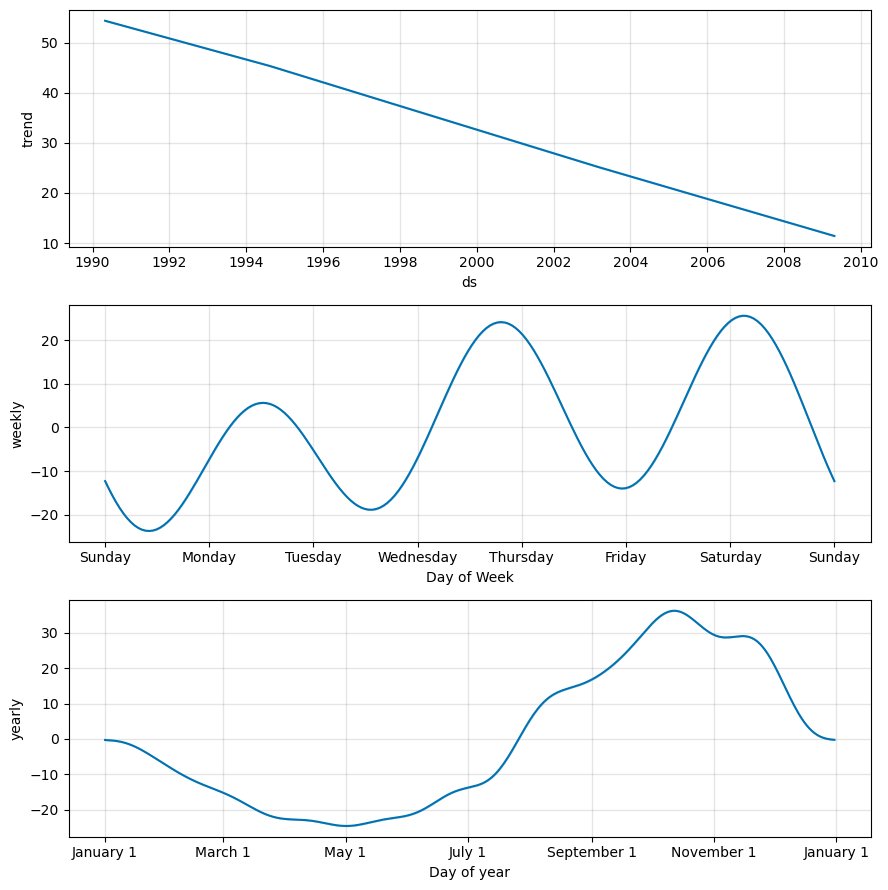

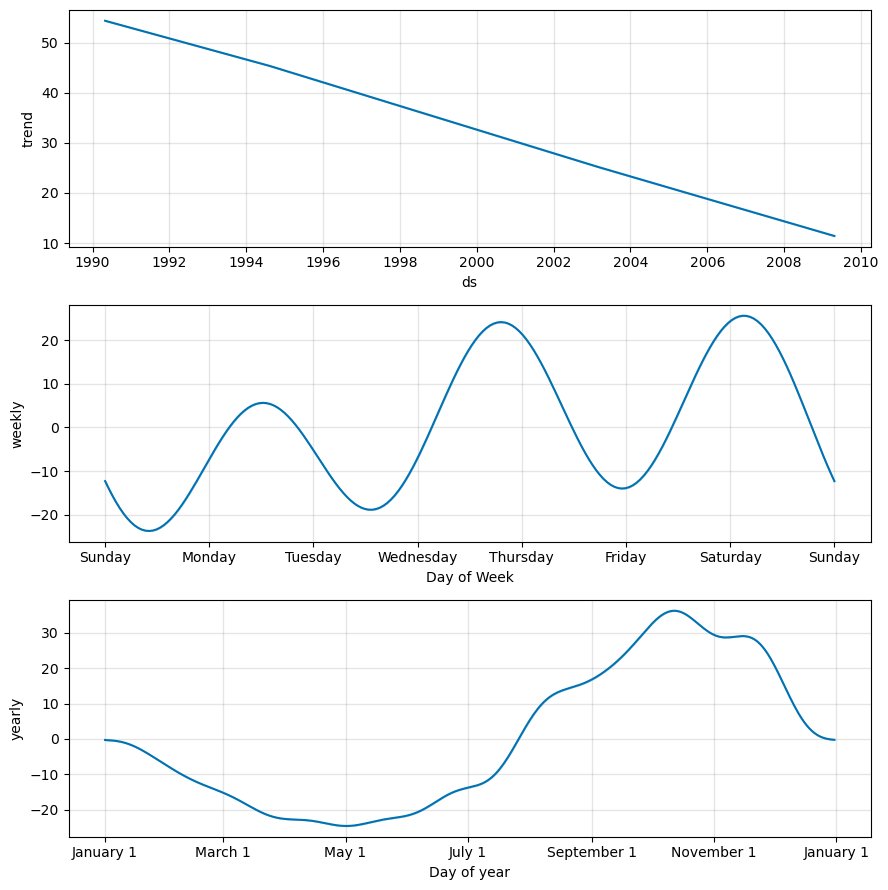

In [17]:
model.plot_components(prediction)

In [18]:
new_df_test

,ds,y
979,2009-02-26,28
980,2009-03-05,28
981,2009-03-12,22
982,2009-03-19,26
983,2009-03-26,24
984,2009-04-02,9
985,2009-04-09,21
986,2009-04-16,10
987,2009-04-23,15


In [19]:
two_months_prediction = prediction[-9:]
two_months_prediction = two_months_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
two_months_prediction

,ds,yhat,yhat_lower,yhat_upper
979,2009-02-26,18.678630,-35.139683,71.843526
980,2009-03-05,16.917637,-37.864476,71.038897
981,2009-03-12,14.784339,-41.029591,65.873603
982,2009-03-19,12.601200,-47.795711,65.014795
983,2009-03-26,11.020228,-42.449529,66.829304
984,2009-04-02,10.330548,-41.718599,66.475191
985,2009-04-09,10.093367,-44.194343,67.105786
986,2009-04-16,9.627708,-45.215663,63.653074
987,2009-04-23,8.819534,-47.911589,63.162312


In [20]:
actual=[]
predicted = []
for i in range(9):
    actual.append(new_df_test['y'].iloc[i])
    predicted.append(two_months_prediction['yhat'].iloc[i])

In [21]:
actual, predicted

([28, 28, 22, 26, 24, 9, 21, 10, 15],
 [18.678630112954167,
  16.917637498974084,
  14.784338586019576,
  12.601199692679028,
  11.020227758798221,
  10.330547920318736,
  10.093367036103256,
  9.627708276375472,
  8.819534232311618])

In [22]:
abs_error=0
for i in range(9):
    abs_error += abs(actual[i] - predicted[i])
mae = abs_error/len(actual)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 8.09


C:\Users\mrinmoy.halder\AppData\Local\Temp\ipykernel_22516\2312464657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_test['ds'] = pd.to_datetime(new_df_test['ds'])


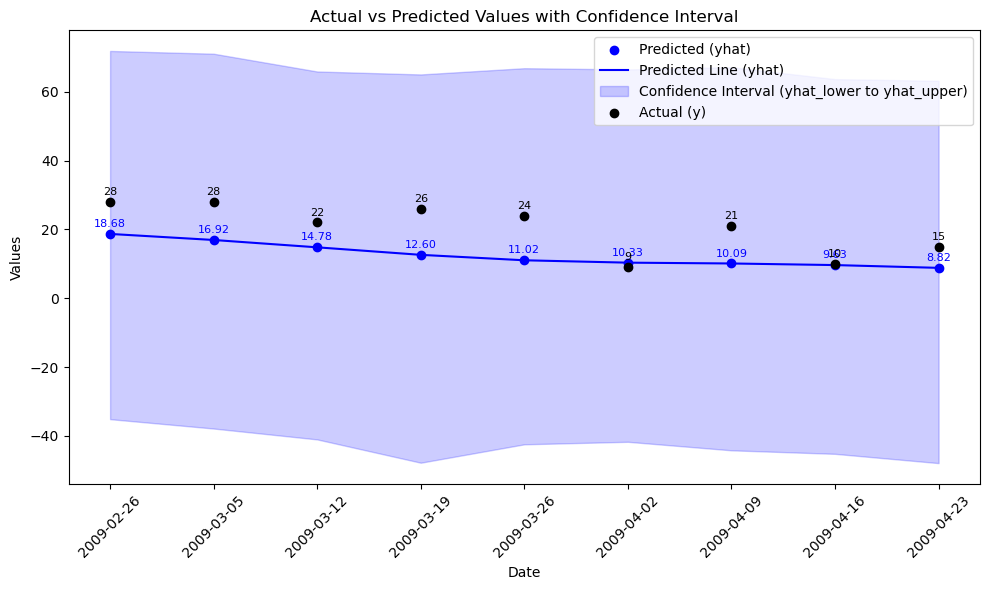

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'ds' columns are in datetime format
two_months_prediction['ds'] = pd.to_datetime(two_months_prediction['ds'])
new_df_test['ds'] = pd.to_datetime(new_df_test['ds'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot predicted values as points (yhat)
plt.scatter(two_months_prediction['ds'], two_months_prediction['yhat'], color='blue', label='Predicted (yhat)', marker='o')

# Plot line over predicted values (yhat)
plt.plot(two_months_prediction['ds'], two_months_prediction['yhat'], color='blue', label='Predicted Line (yhat)')

# Plot shaded area between yhat_lower and yhat_upper
plt.fill_between(two_months_prediction['ds'], two_months_prediction['yhat_lower'], two_months_prediction['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval (yhat_lower to yhat_upper)')

# Plot actual values with black dotted sample points (y)
plt.scatter(new_df_test['ds'], new_df_test['y'], color='black', label='Actual (y)', marker='o', zorder=3)

# Annotate predicted values (yhat)
for index, row in two_months_prediction.iterrows():
    plt.annotate(f"{row['yhat']:.2f}", 
                 (row['ds'], row['yhat']), 
                 textcoords="offset points", 
                 xytext=(0, 5),  # 5 points vertical offset
                 ha='center', 
                 fontsize=8,
                 color='blue')

# Add annotations for actual values (y)
for index, row in new_df_test.iterrows():
    plt.annotate(f"{row['y']}", 
                 (row['ds'], row['y']), 
                 textcoords="offset points", 
                 xytext=(0, 5),  # 5 points vertical offset
                 ha='center', 
                 fontsize=8,
                 color='black')

# Set x-ticks to show the actual dates present in the actual values dataframe
plt.xticks(new_df_test['ds'], rotation=45)  # Use the actual dates from 'ds' and rotate for better readability

# Labels and titles
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values with Confidence Interval')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [24]:
# Perform cross-validation
df_cv = cross_validation(model, initial='300 W', period='52 W', horizon= '8 W')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv, rolling_window=1)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
# mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
# rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'Root Mean Squared Error: {rmse:.2f}')

  0%|          | 0/13 [00:00<?, ?it/s]

20:57:04 - cmdstanpy - INFO - Chain [1] start processing
20:57:04 - cmdstanpy - INFO - Chain [1] done processing
20:57:04 - cmdstanpy - INFO - Chain [1] start processing
20:57:04 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing
20:57:05 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing
20:57:05 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing
20:57:05 - cmdstanpy - INFO - Chain [1] done processing
20:57:05 - cmdstanpy - INFO - Chain [1] start processing
20:57:06 - cmdstanpy - INFO - Chain [1] done processing
20:57:06 - cmdstanpy - INFO - Chain [1] start processing
20:57:06 - cmdstanpy - INFO - Chain [1] done processing
20:57:06 - cmdstanpy - INFO - Chain [1] start processing
20:57:06 - cmdstanpy - INFO - Chain [1] done processing
20:57:06 - cmdstanpy - INFO - Chain [1] start processing
20:57:07 - cmdstanpy - INFO - Chain [1]

Mean Absolute Error: 32.12


In [25]:
import pickle

with open('prophet.pkl', 'wb') as f:
    pickle.dump(model, f)